
246489 - кількість значень файлу hama3.wav; 120 - кількість вікон у файлі hama3.wav
304820 - кількість значень файлу hama2.wav; 148 - кількість вікон у файлі hama2.wav



<IPython.core.display.Javascript object>


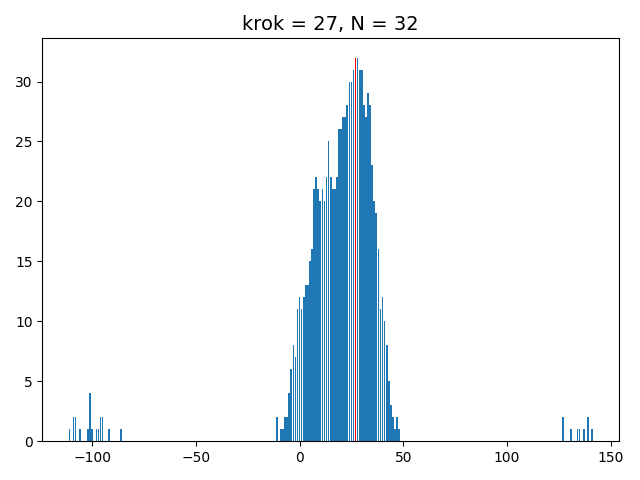

<IPython.core.display.Javascript object>


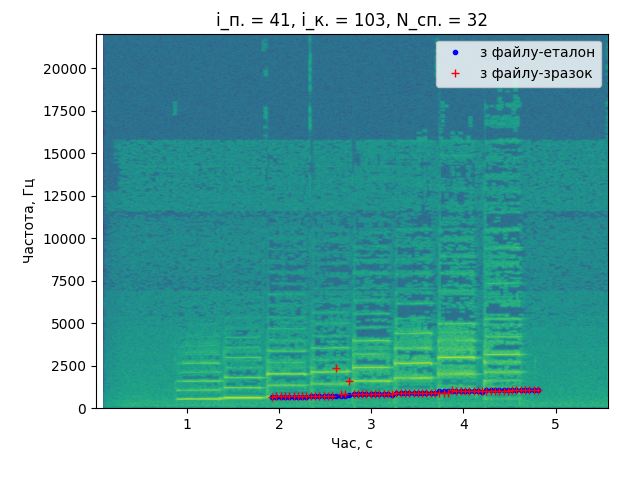

<IPython.core.display.Javascript object>


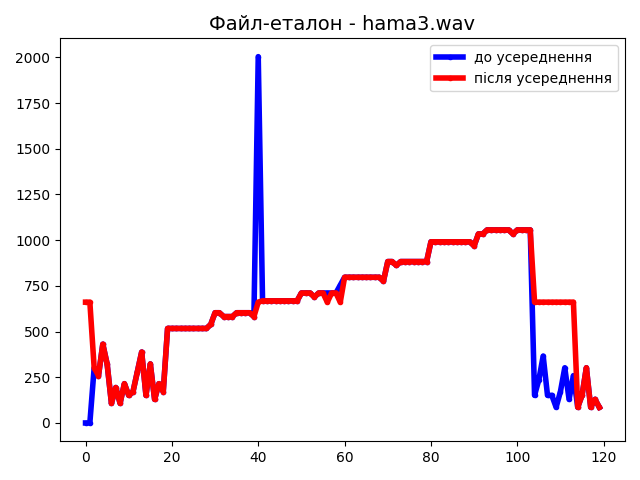

<IPython.core.display.Javascript object>


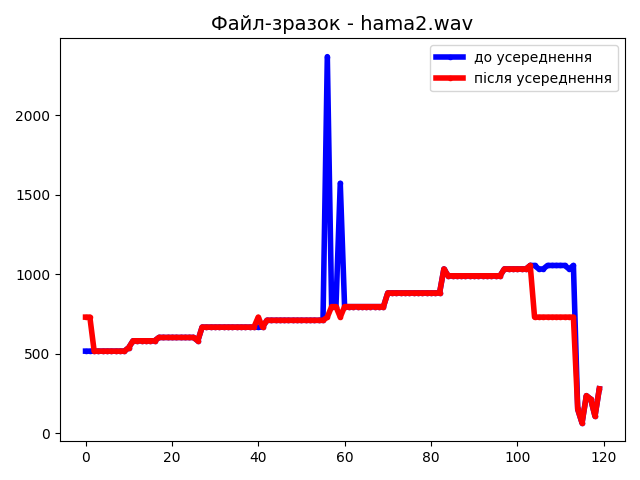

koef0 = 0.456 - без усереднення
koef1 = 0.665 - усереднювали у масиві, отриманому з файлу-еталон
koef2 = 0.748 - усереднювали у масиві, отриманому з файлу-зразок
z = 15 - кількість замін при усередненні


<IPython.core.display.Javascript object>


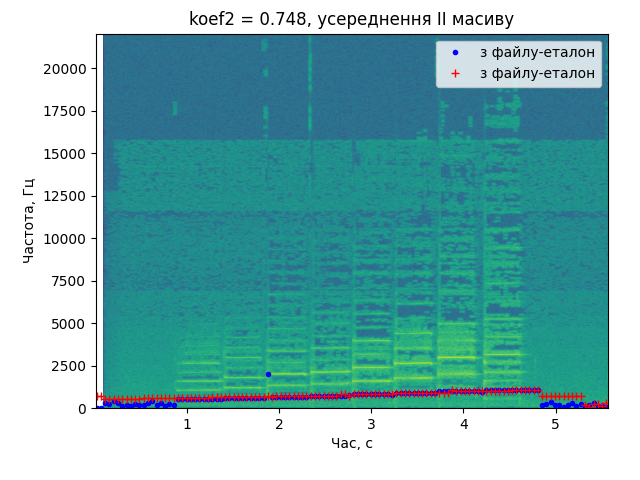

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
import sys
import wave
%matplotlib notebook
print()
def p1(t1):
    #ключ - число, значення - індекси зустрічей числа в t1
    # словник, тобто пара: ключ (число) і значення (список індексів списку t1 де є дане число)
    d={i: [] for i in set(t1)}
    for i in range(len(t1)):
        d[t1[i]].append(i)
    return d

def p2(t2):
    mas=[]
    mas_indx=[]
    for i in range(len(t2)): # i - індекси t2
        if t2[i] in d: #чи є елемент t2[i] у масиві t1?
            for j in d[t2[i]]: # j - індекси t1
                mas.append(i-j)# різниця індексів однакових частот
                mas_indx.append([i,j])
    return mas,mas_indx

def p3(t3):
    tt3=sorted(list(set(t3)))
    tt4=[]
    for k in range(len(tt3)):
        tt4.append(t3.count(tt3[k]))
    return tt3,tt4

def zapus(n,fl):
    A=[]
    filename=fl
    znach_1 = wave.open(filename,"r")
    znach1_16 = znach_1.readframes(-1)
    znach_2 = np.frombuffer(znach1_16, dtype='int16')
    audio_file = wave.open(filename)
    CHANNELS2 = audio_file.getnchannels()
    if CHANNELS2==2:
        znach_2=znach_2[::2]
    
    text=open('spilne2_'+str(n)+'.txt','w')  
    xf = np.linspace(0, RATE, CHUNK)  #від 0 до RATE розмістити CHUNK точок 
    for k in range(int(len(znach_2)/CHUNK)):
        yf = fft(znach_2[CHUNK*k:CHUNK*(k+1)])
        yf2=[]
        for k in range(len(yf)):
            yf2.append(abs(yf[k])/(0.5 * CHUNK))
        text.write(str(round(xf[yf2.index(max(yf2[0:int(len(yf2)/4)]))]))+' ')
        A.append(max(yf2[0:int(len(yf2)/4)]))
    text.close()
    print(len(znach_2), '- кількість значень файлу', fl+';',int(len(znach_2)/CHUNK),'- кількість вікон у файлі', fl)
    return A,znach_2

def korel(x,y):
    xs=sum(x)/len(x)
    ys=sum(y)/len(y)
    dx,dy,dx2,dy2,dxy=[],[],0,0,0
    for k in range(len(x)):
        dx=dx+[x[k]-xs]
        dy=dy+[y[k]-ys]
        dxy=dxy+dx[-1]*dy[-1]
        dx2=dx2+dx[-1]**2
        dy2=dy2+dy[-1]**2
    if dy2==0:
        dy2=1
    if dx2==0:
        dx2=1
    if dxy==0:
        dxy=1
    return dxy/(dx2*dy2)**(0.5)

def max_r(x,y):
    r=500
    zamina=[]
    sum_x,sum_y=0,0
    for k in range(len(x)):
        if abs(x[k]-y[k])>r:
            zamina.append(k)
        else:
            sum_x=sum_x+x[k]
            sum_y=sum_y+y[k]
    if len(zamina)>0:
        xs=sum_x/(len(x)-len(zamina))
        ys=sum_y/(len(y)-len(zamina))
        x1,x2=x.copy(),x.copy()
        y1,y2=y.copy(),y.copy()
        for k in range(len(zamina)):
            x1[zamina[k]]=xs
            y2[zamina[k]]=ys
        return (x1,y1,x2,y2,len(zamina))
    else:
        return 0 
    
def function(wave_data):
    global p1,p2,p3
    p1,p2,p3=plt.mlab.specgram(wave_data,NFFT=CHUNK, noverlap=0, Fs=RATE)
    
def show_specgram(wave_data,gr):    
    gr.specgram(wave_data,
        NFFT=CHUNK, noverlap=CHUNK - STEP, Fs=RATE)
    gr.set_xlabel('Час, с')
    gr.set_ylabel('Частота, Гц')
    plt.show()
    
RATE = 44100
CHUNK = 1024*2
STEP = 512

file=['hama3.wav','hama2.wav']
Amp1,znach1=zapus(1,file[0])
Amp2,znach2=zapus(2,file[1])

text1=open('spilne2_1.txt','r')
text2=open('spilne2_2.txt','r')
t1=1
t2=2
dt=512
f=44100
n1=int(t1*f/dt)
n2=int(t2*f/dt)
s1=text1.read()
s2=text2.read()
ch1=list(map(int, s1.split( )))
ch2=list(map(int, s2.split( )))
n1,n2=len(ch1),len(ch2)
text1.close()
text2.close()
v=[]
ch_1=ch1[:n1]
ch_2=ch2[:n2]

d=p1(ch1)
s,s_2=p2(ch2)
x_hist,y_hist=p3(s)
krok,Nsp=x_hist[y_hist.index(max(y_hist))],max(y_hist)

odn=[[],[]]
for k in range(len(s)):
    if s[k]==krok:
        odn[0].append(s_2[k][1])
        odn[1].append(s_2[k][0])
        
if krok>0:
    ch2=ch_2[krok:len(ch2)]    
    ch1=ch_1[0:len(ch2)]    
    ch2=ch2[0:len(ch1)]
    
    znach2=znach2[krok*CHUNK:len(znach2)]
    znach1=znach1[0:len(znach2)]
    znach2=znach2[0:len(znach1)]
else:
    ch1=ch_1[abs(krok):len(ch1)]
    ch2=ch_2[0:len(ch1)]
    ch1=ch1[0:len(ch2)]
    
    znach1=znach1[abs(krok)*CHUNK:len(znach1)]
    znach2=znach2[0:len(znach1)]
    znach1=znach1[0:len(znach2)]

koef0=round(korel(ch1,ch2),3)

mas=max_r(ch1.copy(),ch2.copy())
if mas!=0:
    ch1_1,ch2_1,ch1_2,ch2_2,z=mas
    koef1=round(korel(ch1_1,ch2_1),3)
    koef2=round(korel(ch1_2,ch2_2),3)
print()
fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 1, 1)
ax1.bar(x_hist, y_hist, label="krok ="+str(krok), linewidth=4)
ax1.bar(krok, Nsp, color='red', linewidth=4)
ax1.set_title('krok = '+str(krok)+', N = '+str(Nsp), fontsize=14)
plt.tight_layout()
fig1.savefig('fihury\ filtr1_1.png', dpi = 1000)

fig2 = plt.figure()
ax2 = fig2.add_axes((0.15, 0.15, 0.8, 0.78))
show_specgram(znach1,ax2)
function(znach1)
if krok>=0:
    j=0
else:
    j=1
ax2.plot(p3[min(odn[j]):max(odn[j])+1], ch1_2[min(odn[j]):max(odn[j])+1], color='blue', marker='.', label='з файлу-еталон', linestyle=' ')
ax2.plot(p3[min(odn[j]):max(odn[j])+1], ch2_1[min(odn[j]):max(odn[j])+1], color='red', marker='+', label='з файлу-зразок', linestyle=' ')
ax2.set_title('i_п. = '+str(min(odn[j]))+', i_к. = '+str(max(odn[j]))+', N_сп. = '+str(Nsp))
plt.legend()
fig2.savefig('fihury\ filtr1_2.png', dpi = 1000)

x3=[k for k in range(len(ch1))]
fig3 = plt.figure()
ax3 = fig3.add_subplot(1, 1, 1)
ax3.plot(x3, ch1, color='blue', marker='.', label="до усереднення", linewidth=4)
ax3.plot(x3, ch1_1, color='red', marker='.', label="після усереднення", linewidth=4)
ax3.set_title('Файл-еталон - ' + file[0], fontsize=14)
plt.legend()
plt.tight_layout()
fig3.savefig('fihury\ filtr1_3.png', dpi = 1000)

x4=[k for k in range(len(ch2))]
fig4 = plt.figure()
ax4 = fig4.add_subplot(1, 1, 1)
ax4.plot(x4, ch2, color='blue', marker='.', label="до усереднення", linewidth=4)
ax4.plot(x4, ch2_2, color='red', marker='.', label="після усереднення", linewidth=4)
ax4.set_title('Файл-зразок - ' + file[1], fontsize=14)
plt.legend()
plt.tight_layout()
fig4.savefig('fihury\ filtr1_4.png', dpi = 1000)

print('koef0 =',koef0,'- без усереднення')
print('koef1 =',koef1,'- усереднювали у масиві, отриманому з файлу-еталон')
print('koef2 =',koef2,'- усереднювали у масиві, отриманому з файлу-зразок')
print('z =',z,'- кількість замін при усередненні')

fig5 = plt.figure()
# x=3
# fig5 = plt.figure(figsize=(12/x,10/x))
ax5 = fig5.add_axes((0.15, 0.15, 0.8, 0.78))
show_specgram(znach1,ax5)
if koef1>=koef2:
    ax5.plot(p3, ch1_1, color='blue', marker='.', label='з файлу-еталон', linestyle=' ')
    ax5.plot(p3, ch2_1, color='red', marker='+', label='з файлу-зразок', linestyle=' ')
    ax5.set_title('kef1 = '+str(koef1)+', усереднення І масиву')
else:
    ax5.plot(p3, ch1_2, color='blue', marker='.', label='з файлу-еталон', linestyle=' ')
    ax5.plot(p3, ch2_2, color='red', marker='+', label='з файлу-еталон', linestyle=' ')
    ax5.set_title('koef2 = '+str(koef2)+', усереднення ІІ масиву')
plt.legend()
fig5.savefig('fihury\ filtr1_5.png', dpi = 1000)